# 3-1. 신경망 구조

주요 요소
- 네트워크(모델)을 구성하는 layers
- input & target
- 학습에 사용할 피드백 신호를 정의하는 loss function
- 학습 진행 방식을 결정하는 Optimizer


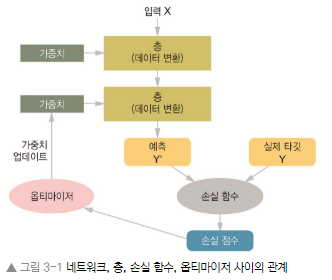

## 층layer : 딥러닝의 구성 단위


- 층은 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 대부분은 가중치라는 층의 상태를 가지나 일부 층은 상태가 없음(**flatten, pooling, dropout** 등), **가중치**는 SGD에 의해 학습되는 하나 이상의 텐서이며 여기에 네트워크가 학습한 지식이 담겨 있음
- 텐서 종류와 어울리는 데이터 처리방식이 존재 : 2D의 경우 Dense로 처리, 3D의 경우 LSTM 같은 순환층으로 처리, 4D의 경우 2D 합성곱 신경망으로 처리


- 층을 딥러닝의 블록으로 비유할 수 있음, 이는 **케라스** 같은 프레임워크 덕분에 가능, 케라스에서는 호환 가능한 층들을 묶어 **데이터 변환 파이프라인**을 구축하여 딥러닝 모델을 만듦
- 여기에서 **층 호환성(layer compatibility)**은 각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환하는 특성을 의미

from keras import layers\
layer = layers.Dense(32, input_shape=(784,))\
\# 32개의 유닛(뉴런)으로 구성된 밀집층

keras에서 layer는 배치 차원인 0번째 축을 지정하지 않음, 이 층은 첫 번째 차원 크기가 784에서 32로 변환된 텐서를 출력, 따라서 그 다음 층은 32차원의 벡터를 입력으로 받아야 하고 keras는 이를 알고 자동으로 크기를 맞춰줌, 즉 이후 층에는 input_shape 매개변수를 입력할 필요가 없음

## 모델 : 층의 네트워크

- 딥러닝 모델은 층으로 만든 Directed Acyclic Graph(DAG)이며, 일반적인 예로 하나의 입력을 하나의 출력으로 매핑하는 층을 순서대로 쌓는 것
- 다양한 네트워크 구조가 존재 : branch가 2개인 네트워크, 출력이 여러 개인 네트워크, Inception 블록 등등
- 네트워크 구조는 hypothesis space(HS)를 정의함, 이때 네트워크 구조를 하나 선택함으로써 가능성 있는 공간(HS)을 입력 데이터에서 출력 데이터로 매핑하는 일련의 특정 텐서 연산으로 제한하게 됨, 우리가 찾아야 하는 것은 이런 텐서 연산에 포함된 가중치 텐서의 최적값


## 손실함수와 옵티마이저

네트워크 구조를 정의하고 나면 손실 함수와 옵티마이저를 선택해야 함
- **손실 함수** : 훈련하는 동안 최소화시킬 목적 함수
- **옵티마이저** : 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정, 특정 종류의 SGD

**여러 개의 출력**을 내는 신경망은 출력당 하나씩 배정하여 여러 개의 손실 함수를 가질 수 있지만, 경사 하강법 과정은 하나의 손실 값을 기준으로 하므로 모든 손실이 평균 등으로 하나의 스칼라 값으로 합쳐짐 

일반적으로 분류, 회귀, 시퀀스 예측 같은 문제에서 손실 함수가 정형화되어 있음
- 2개 클래스만 있는 분류 : binary cross-entropy
- 다수의 클래스가 있는 분류 : categorical cross-entopy
- 회귀 : Mean Absolute/Square Error
- 시퀀스 : CTC(Connection Temporal Classification)



# 3-2. 케라스 소개

케라스의 특징
- 동일한 코드로 CPU, GPU 모두 사용 가능
- 사용하기 쉬운 API
- 합성곱 신경망, 순환 신경망을 지원
- 다중 입력, 다중 출력, 층의 공유, 모델 공유 등 다양한 네트워크 구조를 만들 수 있음 (GAN, Neural 튜링머신 등)


케라스는 딥러닝 모델을 만들기 위한 고수준의 구성요소를 제공하는 모델 수준의 **라이브러리**, 케라스는 하나의 텐서 라이브러리에 국한하여 구현되어 있지 않고 모듈 구조로 구성되어 있기에 여러 백엔드 엔진(tensorflow, theano, CNTK)에서 사용할 수 있음

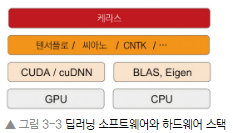

모델을 정의하는 방법은 **Sequential**(층을 순서대로 쌓아 올린 네트워크)과 **함수형 API**(임의 구조를 만들 수 있음)로 2가지


1. Sequential\
model = model.Sequential()\
model.add(keras.layers.Dense(32, activation='relu', input_shape=(784,)))\
model.add(keras.layers.Dense(10, activation='softmax')

2. 함수형 API\
input = layers.Input(shape=(784,))\
x = layers.Dense(32, activation='relu')(input)\
output = layers.Dense(10, activation='softmax')(x)\
model = model.Model(inputs=input, outputs=output)

함수형 API는 연결 구조를 만든 뒤 처음과 끝을 model에 넣어주면 됨

compile 단계에서 학습과정이 설정됨, 여기서 Optimizer와 loss ftn, 훈련하는 동안 모니터링 하기 위해 필요한 측정 지표를 지정

model.compile(optimizer='RMSprop', loss='mse', metrics=['accuracy'])

마지막으로 input 데이터와 그에 상응하는 target 데이터를 모델의 fit 메서드에 전달하여 학습

model.fit(input, target, epochs=10, batch_size=128)

# 3-3. 딥러닝 컴퓨터 세팅

# 3-4. 이진 분류 : 영화 리뷰 분류

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
print(train_data[:10]) # [리뷰1, 리뷰2, ...] 이때 리뷰1=list(단어1, 단어2, ....)
print(train_labels[:10])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
len(train_data)

25000

In [ ]:
# 직접 원-핫 인코딩 (list -> tensor), 전부를 퉁쳐서 어느 단어가 하나라도 있다면 그 단어와 대응되는 숫자를 가지는 인덱스를 1로 맞춤
import numpy as np
def vectorize_sequences(sequences, dimension=10000) :
  results = np.zeros((len(sequences), dimension)) # (25000, 10000)
  for i, sequence in enumerate(sequences) :   # enumerate : 인덱스와 해당 값을 따로 떼어내어 반환
    results[i,sequence] = 1                   # sequence는 list형태인데, list 또한 indexing할 수 있음!! : 이하 참조(list 내 원소들을 개별적으로 indexing....wow)
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print(x_train[0, 0:10])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [ ]:
seq = np.array([[1,2,3],[4,5,6],[7,8,9]])
res = np.zeros((len(seq), 10))
for i, s in enumerate(seq) :
  res[i,s]=1
print(res)


[[0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


**신경망 모델 만들기**

- 입력 데이터는 벡터, label은 스칼라
- 16개의 은닉 유닛이 있다는 것은 W(가중치 행렬)의 크기가 (input_dimension, 16)이라는 것으로 입력데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영되고 절편 벡터 b를 더한 뒤 relu 연산을 적용
- 표현 공간의 차원을 '신경망이 내재된 표현을 학습할 때 가질 수 있는 **자유도**'로 이해할 수 있음, 은닉 유닛을 늘리면 신경망이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원치 않는 패턴까지 학습할 수 있음



Dense 층을 쌓을 때 결정해야 하는 요소
- 층의 개수
- 각 층의 은닉 유닛 개수

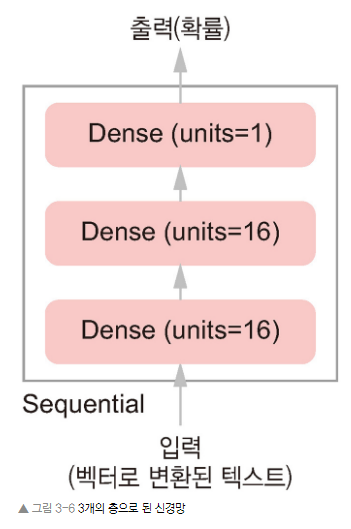

In [ ]:
# 모델 정의하기
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))



손실함수와 옵티마이저를 선택해야함\
이진 분류 문제이고 신경망 출력이 확률이기 때문에 binary_crossentropy 손실함수가 적절 (다만 mean_squared_error도 가능은 함)\
크로스엔트로피는 원본 분포와 예측 분포 사이를 측정

In [ ]:
# 옵티마이저 설정 및 모델 컴파일
rmsprop = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
# 모델 훈련하기
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.4927 - accuracy: 0.7866 - val_loss: 0.3636 - val_accuracy: 0.8730
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2855 - accuracy: 0.9071 - val_loss: 0.3083 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2125 - accuracy: 0.9297 - val_loss: 0.2835 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1662 - accuracy: 0.9467 - val_loss: 0.2893 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1391 - accuracy: 0.9539 - val_loss: 0.2842 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1110 - accuracy: 0.9672 - val_loss: 0.2972 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0965 - accuracy: 0.9716 - val_loss: 0.3278 - val_accuracy: 0.8808
Epoch 8/20
30

model.fit() 메서드는 history 객체를 반환하며 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 history 속성을 가지고 있음

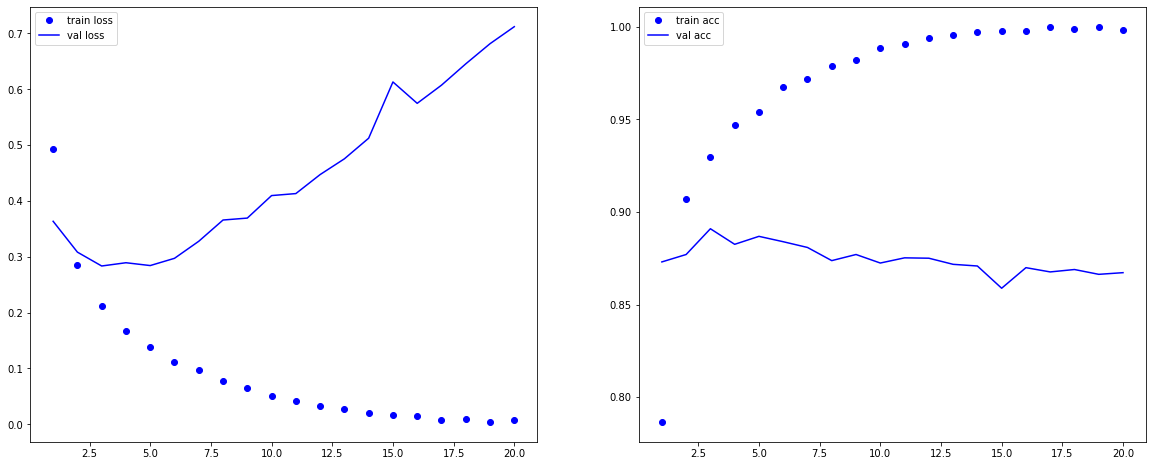

In [ ]:
import matplotlib.pyplot as plt

epochs= range(1,len(history.history['loss'])+1)

fig, axes = plt.subplots(1,2 ,figsize=(20,8))
axes[0].plot(epochs, history.history['loss'], 'bo', label='train loss') # bo : 파란색 점
axes[0].plot(epochs, history.history['val_loss'], 'b', label='val loss') # b : 파란색 실선
axes[0].legend()

axes[1].plot(epochs, history.history['accuracy'], 'bo' , label='train acc') # bo : 파란색 점
axes[1].plot(epochs, history.history['val_accuracy'], 'b', label='val acc') # b : 파란색 실선
axes[1].legend()

# plt.subplot(1,2,1)
# plt.subplot(1,2,2)

plt.show()

matplotlib subplots 사용법 :   https://hwi-doc.tistory.com/entry/matplotlib-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC

현재 validation의 그래프를 보면 초기에 loss가 감소하다가 점차 증가, epochs=20은 **과대적합** 상황

In [ ]:
# epochs를 4로 재설정
from tensorflow import keras
model2 = keras.Sequential()
model2.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(keras.layers.Dense(16, activation='relu'))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model2.evaluate(x_test, test_labels)
print(results)

Epoch 1/4
30/30 [==============================] - 3s 59ms/step - loss: 0.5000 - accuracy: 0.7790 - val_loss: 0.3958 - val_accuracy: 0.8410
Epoch 2/4
30/30 [==============================] - 1s 44ms/step - loss: 0.2907 - accuracy: 0.9033 - val_loss: 0.3033 - val_accuracy: 0.8851
Epoch 3/4
30/30 [==============================] - 1s 47ms/step - loss: 0.2114 - accuracy: 0.9321 - val_loss: 0.2758 - val_accuracy: 0.8926
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3214 - accuracy: 0.8703
[0.3214256167411804, 0.8703200221061707]


In [ ]:
# 새로운 데이터 예측하기
model2.predict(x_test)

array([[0.17743918],
       [0.998138  ],
       [0.8360626 ],
       ...,
       [0.07575396],
       [0.09626135],
       [0.44339412]], dtype=float32)

이진 분류에서 모델 예측 시 0.99 or 0.01은 확실하게 예측한다는 의미지만 0.6 or 0.4는 확신이 부족하다는 뜻

Epoch 1/10
30/30 [==============================] - 3s 63ms/step - loss: 0.1671 - accuracy: 0.7881 - val_loss: 0.1241 - val_accuracy: 0.8533
Epoch 2/10
30/30 [==============================] - 1s 43ms/step - loss: 0.0890 - accuracy: 0.9055 - val_loss: 0.0924 - val_accuracy: 0.8846
Epoch 3/10
30/30 [==============================] - 1s 43ms/step - loss: 0.0630 - accuracy: 0.9335 - val_loss: 0.0890 - val_accuracy: 0.8821
Epoch 4/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0490 - accuracy: 0.9480 - val_loss: 0.0829 - val_accuracy: 0.8883
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0398 - accuracy: 0.9590 - val_loss: 0.0869 - val_accuracy: 0.8818
Epoch 6/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0335 - accuracy: 0.9656 - val_loss: 0.0844 - val_accuracy: 0.8851
Epoch 7/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0254 - accuracy: 0.9760 - val_loss: 0.0860 - val_accuracy: 0.8837
Epoch 8/10
30

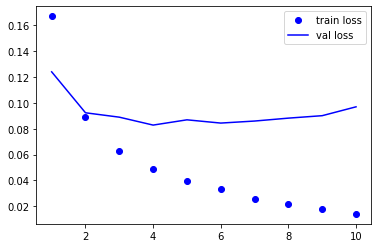

In [ ]:
# 다양한 variation : 은닉층 수, optimizer 종류, activation 함수 종류, loss 함수 종류, batch_size 등등)

from tensorflow import keras
import matplotlib.pyplot as plt

model3 = keras.Sequential()
model3.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(keras.layers.Dense(16, activation='relu'))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

history = model3.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

epochs= range(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], 'bo', label='train loss') # bo : 파란색 점
plt.plot(epochs, history.history['val_loss'], 'b', label='val loss') # b : 파란색 실선
plt.legend()

results = model3.evaluate(x_test, test_labels)
print(results)

# 3-5. 다중 분류 : 뉴스 기사 분류

2개 이상의 클래스를 다룰 경우 : 로이터Reuter 뉴스를 46개의 상호배타적인 토픽(클래스)으로 분류하는 신경망, 이 경우 각 데이터 포인트가 단 하나의 레이블만 가지므로 **단일 레이블 다중분류** (만약 클래스 중복이 가능하다면 **다중 레이블 다중 분류**)


In [ ]:
# 데이터 가져오기
from tensorflow import keras
(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print(train_data.shape, train_labels.shape)
print(test_data.shape)
# imdb처럼 각 샘플은 정수 리스트

(8982,) (8982,)
(2246,)


In [ ]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [ ]:
# label의 종류
import numpy as np
len(np.unique(train_labels))

46

In [ ]:
# 데이터 인코딩 (3-4와 동일)
def vectorize_sequences(sequences, dimension=10000) :
  a = np.zeros((sequences.shape[0],dimension))
  for i, sequence in enumerate(sequences) :
    a[i,sequence] = 1.
  return a

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0,:10])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


여기서는 data 뿐만 아니라 label 역시 변환시켜줘야 하는데
label을 벡터로 바꾸는 방법은 2가지
1. 레이블의 리스트를 정수 텐서로 변환하는 것
2. **원-핫 인코딩(categorical encoding)**을 사용하는 것 
label 역시 순서체가 아니기 때문에 서로 상관이 없는 개별 텐서로 쪼개야 함

이 경우 레이블의 원-핫 인코딩은 각 레이블의 인덱스 자리는 1이고 나머지는 0인 벡터 ex. 1이면 1번 자리만 1이고 나머지는 0인 array

In [ ]:
def to_one_hot(labels, dimension=46) :
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels) :
    results[i,label] = 1.
  return results

oh_train_labels = to_one_hot(train_labels)
oh_test_labels = to_one_hot(test_labels)

In [ ]:
print(oh_train_labels[:5, :5])

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
# 또다른 방법으로 keras 내장함수인 to_categorical을 사용하는 것
oh2_train_labels = keras.utils.to_categorical(train_labels)
oh2_test_labels = keras.utils.to_categorical(test_labels)
print(oh2_train_labels[:5, :5])

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


먼저 모델 구성에 있어 이전과 달리 출력 클래스가 2에서 46으로 늘어남\
Dense 층을 쌓으면 이전 층의 출력에서 제공한 정보만 사용할 수 있어 한 층이 필요한 정보를 누락하면 이후 층은 이를 복원할 수 없기에 **정보의 병목(information bottleneck)**이 발생가능\
특히 46개와 비교해서 16개의 유닛은 규모가 작아 정보의 병목 가능성이 높아짐 → 64개를 사용 

In [ ]:
# 모델 정의하기
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax')) # 각 입력 샘플에 대해 46차원 벡터를 출력

In [ ]:
# 모델 컴파일
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 검증 세트 분할
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = oh_train_labels[:1000]
partial_y_train = oh_train_labels[1000:]

In [ ]:
# 모델 훈련
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 56ms/step - loss: 2.6005 - accuracy: 0.5353 - val_loss: 1.7055 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.3899 - accuracy: 0.7129 - val_loss: 1.3102 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0285 - accuracy: 0.7806 - val_loss: 1.1246 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8108 - accuracy: 0.8255 - val_loss: 1.0364 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6439 - accuracy: 0.8642 - val_loss: 0.9864 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5141 - accuracy: 0.8923 - val_loss: 0.9500 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4129 - accuracy: 0.9163 - val_loss: 0.9190 - val_accuracy: 0.8060
Epoch 8/20
16

<function matplotlib.pyplot.show>

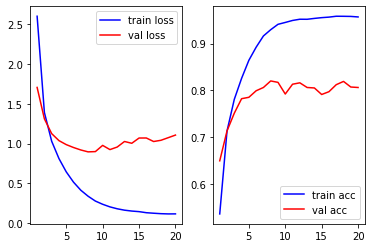

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(range(1,21), history.history['loss'], 'b', label='train loss')
plt.plot(range(1,21), history.history['val_loss'], 'r', label='val loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,21), history.history['accuracy'], 'b', label='train acc')
plt.plot(range(1,21), history.history['val_accuracy'], 'r', label='val acc')
plt.legend()

plt.show

9번째 epoch 이후로 과대적합이 관측되므로 epochs=9로 수정하여 다시 훈련

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results2 = model2.evaluate(x_test, oh_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 54ms/step - loss: 2.6542 - accuracy: 0.5382 - val_loss: 1.7770 - val_accuracy: 0.6570
Epoch 2/9
16/16 [==============================] - 1s 51ms/step - loss: 1.4414 - accuracy: 0.7015 - val_loss: 1.3179 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 1.0626 - accuracy: 0.7714 - val_loss: 1.1601 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8352 - accuracy: 0.8200 - val_loss: 1.0421 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 44ms/step - loss: 0.6713 - accuracy: 0.8524 - val_loss: 0.9625 - val_accuracy: 0.8130
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5379 - accuracy: 0.8836 - val_loss: 0.9340 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4278 - accuracy: 0.9094 - val_loss: 0.9012 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [ ]:
results2

[0.9822313189506531, 0.784060537815094]

test set에 대해 78%의 정확도를 보임\
이 문제는 불균형한 데이터셋을 사용하므로 무작위로 분류하면 18%의 정확도를 달성

In [ ]:
# 무작위 분류의 정확도 측정
import copy
test_labels_copy = copy.copy(test_labels)

results_shuffle = []
for i in range(100) :  # 셔플을 10번 진행할 때 결과값들에 대한 평균과 표준편차
  np.random.shuffle(test_labels_copy)
  hits_array = np.array(test_labels) == np.array(test_labels_copy)
  results_shuffle.append(float(np.sum(hits_array))/len(hits_array))
results_shuffle = np.array(results_shuffle)
print(np.mean(results_shuffle), np.std(results_shuffle))

0.187479964381122 0.0075013158350680795


In [ ]:
# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)
print(predictions[0].shape)  # 각 항목은 길이가 46인 벡터
print(np.sum(predictions[0]))  # 한 벡터의 원소합은 1
print(np.argmax(predictions[0]))   # 가장 큰 확률값을 가지는 클래스가 예측 클래스 

(46,)
0.9999999
3


**레이블**을 인코딩하는 다른 방법은 **정수 텐서**로 변환하는 것

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

이 방식을 사용하려면 loss 함수로 'sparse_categorical_crossentropy'를 사용해야 함\
categorical_crossentropy는 레이블이 범주형 인코딩일 것이라고 기대하기 때문

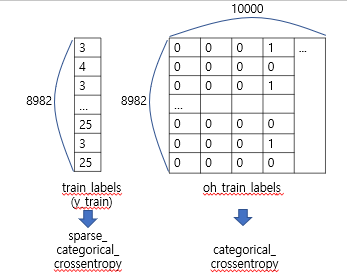

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

만약 중간 Dense에서 충분히 유닛이 크지 않을 경우 정확도가 크게 떨어질 수 있음(ex. Dense(4)인 경우 정확도가 71%까지 하락)

# 3-6. 회귀 : 주택 가격 예측

Regression : 입력 데이터의 개별적인 레이블을 예측하는 것이 목적이 아닌 연속적인 값을 예측


In [ ]:
# 데이터 로드
from tensorflow import keras
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
print(train_data.shape, train_targets.shape)
print(test_data.shape)

(404, 13) (404,)
(102, 13)


404개의 훈련 샘플과 102개의 테스트 샘플, 13개의 수치 특성(numerical features)으로 1인당 범죄율, 주택당 평균 방의 개수, 고속도로 접근성

In [ ]:
train_targets[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

데이터 준비
- 상이한 **scale**을 가진 값을 신경망에 주입하면 문제 발생!(스케일이 다르면 global min을 찾아가는 경사하강법의 경로가 스케일이 큰 특성에 영향을 많이 받음) 
- 따라서 특성들을 **정규화**하는 방법이 대표적

In [ ]:
# 데이터 정규화
mean = train_data.mean(axis=0)   # 축0: 특성별 평균
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

print(mean, std)



[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01] [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [ ]:
test_data -= mean  
test_data /= std

In [ ]:
# 사이킷런 메소드/객체를 사용하는 방법

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(train_data)
# train_data = ss.transform(train_data)
# test_data = ss.transform(test_data)

테스트 데이터를 정규화할 때 사용한 값(mean)은 **훈련 데이터에서 계산한 값**! \
마찬가지로 새로운 데이터를 예측할 때 훈련 데이터에서 계산한 값을 이용해서 정규화해야 함, 그렇지 않으면 훈련 데이터에서 학습한 정보가 무의미해짐

In [ ]:
def build_model():
  model = keras.Sequential()
  model.add(keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) # train_data.shape[1]은 수치 특성 수
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

이 네트워크의 마지막 층은 하나의 유닛을 가지며 활성화 함수가 없는 **선형 층**\
이것이 전형적인 하나의 연속적인 값을 예측하는 회귀를 위한 구성\
활성화 함수를 적용하면 출력 값의 범위가 제한되기에 네트워크가 어떤 범위의 값이라도 예측하도록 자유롭게 학습


**k-fold cross validation**
- 에포크 수와 같은 매개변수들을 조정하면서 모델을 평가하기 위해 train과 val 세트를 나누는데 검증 세트와 훈련 세트로 **어떤 데이터 포인트가 선택되는가**에 따라 검증 점수가 크게 달라질 수 있음 
- 즉 검증 세트 분할에 대한 검증 점수의 분산이 높아 신뢰 있는 모델 평가가 어려울 수 있음
- 이러한 상황에서 k-fold CV을 사용

In [ ]:
# k-fold cross validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k) :
  print('처리중인 fold no.',i)
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]       # k개로 분할했을 때 개별 토막 val data
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  # 나머지는 train으로 사용함
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:] ], axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:] ], axis=0
  )
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
print(np.mean(all_scores))

처리중인 fold no. 0
처리중인 fold no. 1
처리중인 fold no. 2
처리중인 fold no. 3
2.3226912021636963


회귀분석 결과 actual과 평균적으로 2322달러 정도 차이남

In [ ]:
# k-fold cross validation & 모든 fold에 대한 epoch별 검증 점수 기록

k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_mae_histories = []
for i in range(k) :
  print('처리중인 fold no.',i)
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]       # k개로 분할했을 때 개별 토막 val data
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  # 나머지는 train으로 사용함
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:] ], axis=0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:] ], axis=0
  )

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, \
                      validation_data=(val_data, val_targets))
  mae_history = history.history['val_mae']  # 얘 자체가 하나의 list
  all_mae_histories.append(mae_history)  # [[...],[...],[...],[...]] 꼴



처리중인 fold no. 0
처리중인 fold no. 1
처리중인 fold no. 2
처리중인 fold no. 3


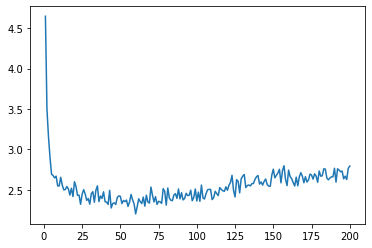

In [ ]:
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories ]) for i in range(num_epochs)
]

import matplotlib.pyplot as plt
plt.plot(range(1,201),average_mae_history)
plt.show()

In [ ]:
# 최종모델
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)
# 약 2730달러 차이

4/4 [==============================] - 0s 3ms/step - loss: 19.1835 - mae: 2.7359
2.735867738723755


# 3-7. 요약